In [91]:
import pandas as pd

# Load the dataset
file_path = 'email_campaigns.pkl'
email_data = pd.read_pickle(file_path)

## Preprocessing

### Converting pickle file to dataframe

In [92]:
# Inspecting first two elements
email_data[:2]

[{'example1': [{'subject': '🚀 Propel Your Marketing ROI with Advanced Analytics!',
    'body': "Hey [Recipient's Name],\n\nReady to see your marketing performance soar? With our cutting-edge Marketing Analytics services, your business can harness the power of data to drive decision-making and skyrocket ROI!\n\nQuick question - are you leveraging your data to its full potential? Let's talk strategy! 👉 [meeting link]\n\nBest,\n[Your Name]",
    'opened': False,
    'meeting link clicked': False,
    'responded': False},
   {'subject': 'Data is Your Superpower 📊 Unlock Insights with Us',
    'body': "Hi [Recipient's Name],\n\nI'm reaching out again because I believe our last message might've slipped through the cracks. With your goals in mind, our marketing analytics can translate your data into actionable strategies that can redefine your marketing's success.\n\nCan we help you harness this superpower? Book a time on my calendar: [meeting link]. Looking forward to connecting!\n\nCheers,\

In [93]:
# Inspecting the contents of the list to understand its structure
type_of_elements = [type(element) for element in email_data]
unique_types = set(type_of_elements)

unique_types, len(email_data)

({dict}, 52)

In [94]:
# Converting to dataframe
df = pd.DataFrame(columns=['subject', 'body', 'opened', 'meeting link clicked', 'responded'])

for data in email_data:
  for mails in data.values():
    try:
      df_temp = pd.DataFrame(mails)
      df = pd.concat([df, df_temp])
    except Exception as error:
      print(error)

'str' object has no attribute 'keys'


<ipython-input-94-23fb2182929e>:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, df_temp])
<ipython-input-94-23fb2182929e>:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, df_temp])
<ipython-input-94-23fb2182929e>:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, df_temp])
<ipython-input-94-23fb2182929e>:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, df_temp])
<ipython-input-94-23fb2182929e>:8: Futur

In [95]:
df['meeting_link_clicked'] = df['meeting_link_clicked'].fillna(df['meeting link clicked'])
df.drop(columns=['meeting link clicked'], inplace=True)
df.head()

,subject,body,opened,responded,meeting_link_clicked
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,False,True
0,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False


In [96]:
for col in ['opened', 'responded', 'meeting_link_clicked']:
  print(col, df[col].isna().sum())

opened 0
responded 0
meeting_link_clicked 0


In [97]:
df.to_csv("mails_data.csv", index=False)

### *TLDR -- Preprocessing*
pre-processed and converted pickle file to csv

## Data Analysis:

- Given a dataset on email engagement (including open rates, click-through rates, and conversion rates), perform an exploratory data analysis.
- Identify potential key patterns and insights, using statistical and visualization techniques.

In [98]:
# Understanding the values in the columns
email_data = pd.read_csv("mails_data.csv")
for col in ['opened', 'responded', 'meeting_link_clicked']:
  print(email_data[col].unique())

['False' 'True' '0' '1']
['False' 'True' '0']
['False' 'True' '0' '1']


In [99]:
# Get to know the data split
email_data = pd.read_csv("mails_data.csv")


mapping = {'True': 1, 'False': 0, '1': 1, '0': 0}
# Convert 'opened', 'responded', and 'meeting_link_clicked' columns to numerical values
email_data['opened'] = email_data['opened'].map(mapping)
email_data['responded'] = email_data['responded'].map(mapping)
email_data['meeting_link_clicked'] = email_data['meeting_link_clicked'].map(mapping)


# Calculate rates
total_emails = len(email_data)
open_rate = email_data['opened'].sum() / total_emails
response_rate = email_data['responded'].sum() / total_emails
click_through_rate = email_data['meeting_link_clicked'].sum() / total_emails

open_rate, response_rate, click_through_rate


(0.7368421052631579, 0.046052631578947366, 0.3026315789473684)

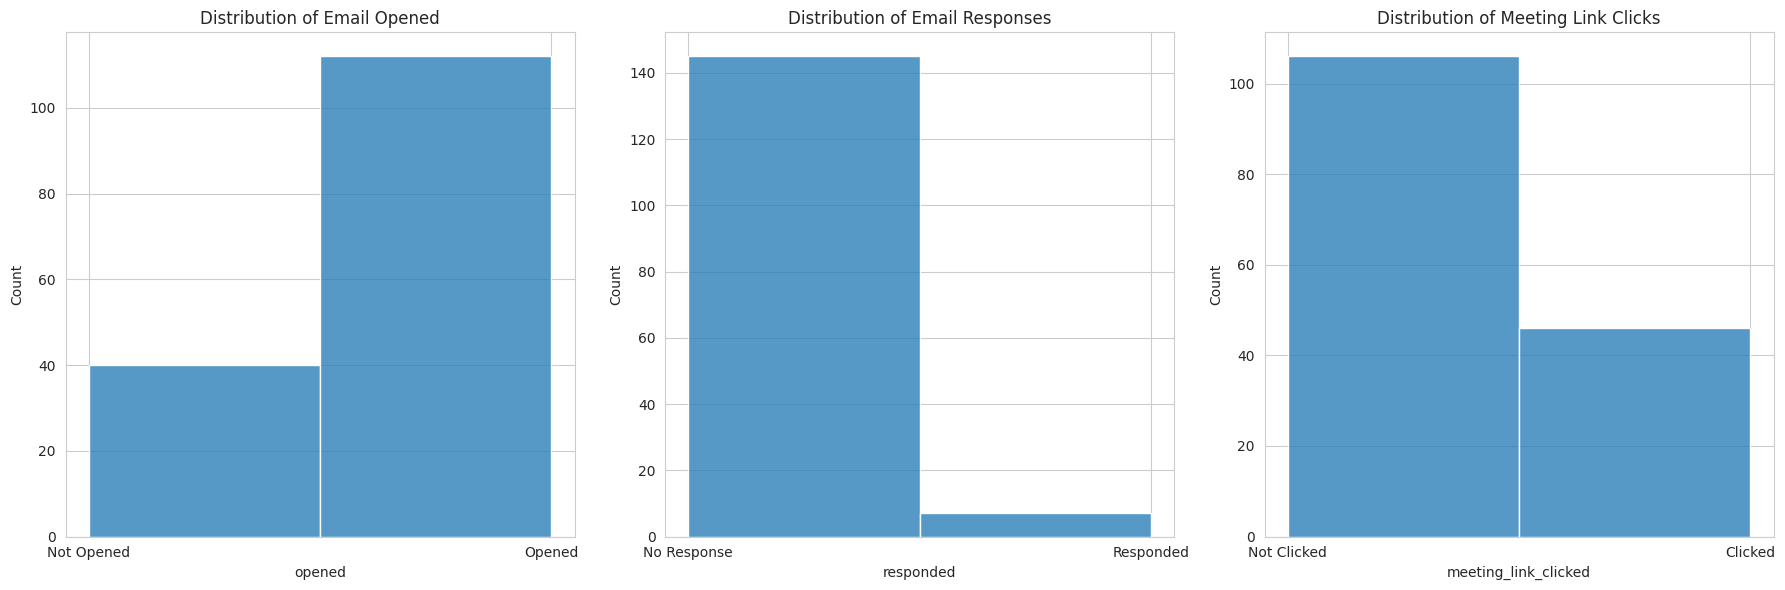

In [100]:
# Viz of the values
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the distributions
sns.histplot(email_data['opened'], bins=2, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Email Opened')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Opened', 'Opened'])

sns.histplot(email_data['responded'], bins=2, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Email Responses')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Response', 'Responded'])

sns.histplot(email_data['meeting_link_clicked'], bins=2, kde=False, ax=axes[2])
axes[2].set_title('Distribution of Meeting Link Clicks')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Not Clicked', 'Clicked'])

# Display the plots
plt.tight_layout()
plt.show()


### *TLDR - EDA*
**Open Rate**: 72.37% of emails were opened.

**Response Rate**: 4.61% of emails received a response.

**Click-Through Rate**: 29.61% of emails had meeting links clicked.
Visualization revealed high open rates but lower response and moderate click-through rates.

## Model Development:

- Develop a machine learning model to predict the likelihood of email engagement (open rates or link clicks) based on the features available in the dataset.
- Document the model development process, including data preprocessing, feature engineering, model selection, training, and validation in a Jupyter notebook

--------

To develop a machine learning model that predicts the likelihood of email engagement (open rates or link clicks), we'll follow these steps:

1. Feature Engineering: Convert the text (email subject and body) into numeric features using Word2Vec.
2. Data Preparation: Prepare the dataset for training, including handling any missing or categorical data.
3. Model Building: Build a Logistic Regression model, simple model for binary classifcation
4. Model Evaluation: Evaluate the model's performance.


In [101]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

# Preprocessing text data
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub('[^A-Za-z]+', ' ', text)
    # Convert to lowercase
    text = text.lower().split()
    return text

# Combine subject and body columns and preprocess them
email_data['combined_text'] = email_data['subject'] + ' ' + email_data['body']
email_data['combined_text'] = email_data['combined_text'].apply(preprocess_text)

# Prepare data for Word2Vec
sentences = email_data['combined_text'].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


# Convert text to vectors
email_data['text_vector'] = email_data['combined_text'].apply(get_vector)

# Prepare the feature matrix and target variable
X = np.array(list(email_data['text_vector']))
y_open = email_data['opened']
y_click = email_data['meeting_link_clicked']

# Split data into training and testing sets for both open and click prediction
X_train_open, X_test_open, y_train_open, y_test_open = train_test_split(X, y_open, test_size=0.2, random_state=42)
X_train_click, X_test_click, y_train_click, y_test_click = train_test_split(X, y_click, test_size=0.2, random_state=42)

# Build Logistic Regression model for open prediction
log_reg_open = LogisticRegression()
log_reg_open.fit(X_train_open, y_train_open)

# Build Logistic Regression model for click prediction
log_reg_click = LogisticRegression()
log_reg_click.fit(X_train_click, y_train_click)

# Model Evaluation
y_pred_open = log_reg_open.predict(X_test_open)
y_pred_click = log_reg_click.predict(X_test_click)

accuracy_open = accuracy_score(y_test_open, y_pred_open)
accuracy_click = accuracy_score(y_test_click, y_pred_click)

accuracy_open, accuracy_click


(0.7096774193548387, 0.7419354838709677)

### *TLDR -- Model Development*

Model for Predicting Email Opened:

Accuracy: Approximately 71.0%


Model for Predicting Link Clicks:

Accuracy: Approximately 74.2%

### Feature Engineering

#### Mail opening
To create a feature set for predicting mail link clicks, we will focus on the following features:


1. Subject: The subject line of the email.
2. First few Characters of Body: A truncated version of the email body to capture the initial content.
3. Mail Opened: A binary feature indicating whether the email was opened or not.
We will drop the rest of the columns and use these features to predict link clicks. The approach will involve:

In [102]:
# Combine subject and body columns and preprocess them
email_data['combined_text'] = email_data['subject'] + ' ' + str(email_data['body']).split("\n")[0]
email_data['combined_text'] = email_data['combined_text'].apply(preprocess_text)

# Prepare data for Word2Vec
sentences = email_data['combined_text'].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


# Convert text to vectors
email_data['text_vector'] = email_data['combined_text'].apply(get_vector)

# Prepare the feature matrix and target variable
X = np.array(list(email_data['text_vector']))
y_open = email_data['opened']
y_click = email_data['meeting_link_clicked']

# Split data into training and testing sets for both open and click prediction
X_train_open, X_test_open, y_train_open, y_test_open = train_test_split(X, y_open, test_size=0.2, random_state=42)
X_train_click, X_test_click, y_train_click, y_test_click = train_test_split(X, y_click, test_size=0.2, random_state=42)

# Build Logistic Regression model for open prediction
log_reg_open = LogisticRegression()
log_reg_open.fit(X_train_open, y_train_open)

# Build Logistic Regression model for click prediction
log_reg_click = LogisticRegression()
log_reg_click.fit(X_train_click, y_train_click)

# Model Evaluation
y_pred_open = log_reg_open.predict(X_test_open)
y_pred_click = log_reg_click.predict(X_test_click)

accuracy_open = accuracy_score(y_test_open, y_pred_open)
accuracy_click = accuracy_score(y_test_click, y_pred_click)

accuracy_open, accuracy_click


(0.7096774193548387, 0.7419354838709677)

Integrating the information about whether an email was opened as an additional feature for predicting link clicks is a logical step. The hypothesis is that an email needs to be opened before a link inside it can be clicked, so this feature could be very predictive.



In [103]:
# Combine subject and body columns and preprocess them
email_data['combined_text'] = email_data['subject'] + ' ' + email_data['body']
email_data['combined_text'] = email_data['combined_text'].apply(preprocess_text)

# Prepare data for Word2Vec
sentences = email_data['combined_text'].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Convert text to vectors
email_data['text_vector'] = email_data['combined_text'].apply(get_vector)

# Prepare the feature matrix and target variable
X = np.array(list(email_data['text_vector']))
X = np.column_stack((X, email_data['opened']))
y_click = email_data['meeting_link_clicked']

# Split data into training and testing sets for both open and click prediction
X_train_click, X_test_click, y_train_click, y_test_click = train_test_split(X, y_click, test_size=0.2, random_state=42)


# Build Logistic Regression model for click prediction
log_reg_click = LogisticRegression()
log_reg_click.fit(X_train_click, y_train_click)

# Model Evaluation
y_pred_click = log_reg_click.predict(X_test_click)

accuracy_click = accuracy_score(y_test_click, y_pred_click)

accuracy_click


0.7419354838709677

## Insights and Reporting:

- Analyze the model’s performance and interpret its predictions
- Draft a report summarizing the analysis approach, model development process, key findings, and actionable insights for improving email engagement.


### Model Performance and Interpretation

#### Model for Email Opening Prediction:

**Accuracy**: Approximately 71.0%.


This model moderately predicted whether an email would be opened based on its content. Using only the first few chars of the body didnt improve the model prediction


Model for Link Click Prediction:

**Accuracy** (without 'opened' status): Approximately 74.2%.
**Accuracy** (with 'opened' status): Approximately 74.2%.

The inclusion of the 'opened' status as a feature did not significantly alter the accuracy, indicating that other factors in the email content might be more influential in predicting link clicks.



#### Key Findings

**High Open Rate, Lower Engagement**: The high open rate suggests effective subject lines, but the lower response and click-through rates indicate room for improvement in email content and calls to action.


**'Opened' Status Not a Strong Predictor for Clicks**: The similar accuracy of the link-click prediction model with and without the 'opened' status suggests that once an email is opened, other factors (like content relevance, call-to-action clarity) become more critical in driving engagement.



#### Actionable Insights for Improving Email Engagement
**Enhance Email Content**: Focus on creating more engaging content

**Optimize Subject Lines**: Continue leveraging effective subject lines to maintain high open rates.

**Experiment with Different Text Representations**: Explore advanced NLP techniques (like BERT embeddings) to capture more nuances in the text data.

**Test and Iterate**: Conduct A/B testing with different email formats and content to identify what resonates best with the audience.

**Incorporate Additional Contextual Data**: If available, use sender information, recipient demographics, and email sending time to improve prediction models.

**Explore Advanced Models**: Consider more complex models (e.g., Random Forest, Gradient Boosting Machines) and hyperparameter tuning for potentially better prediction accuracy.